# Task 3P 

# Numpy Matrices

Name: Addala Srivatsa Gaurav

Student Id: S223872808

Email Id: asgaurav9@gmail.com

I am a Postgraduate Student(SIT731). 

# 1. Introduction

In this notebook, we explore body measurement data from the National Health and Nutrition Examination Survey (NHANES) dataset, specifically focusing on adult males and females. We utilize two CSV files, namely nhanes_adult_male_bmx_2020.csv and nhanes_adult_female_bmx_2020.csv, obtained from the provided GitHub repository. Using the NumPy library, we read the datasets into numpy matrices named male and female, each containing seven columns representing various body measurements.

To enhance our analysis, we compute the Body Mass Index (BMI) for each participant, adding an eighth column to both datasets. Subsequently, we create visualizations such as histograms and box-and-whisker plots to illustrate the distribution of male and female BMIs. Further, numerical aggregates, including measures of location, dispersion, and shape, are calculated and presented in a tabular format.

The obtained results are analyzed to provide insights into the characteristics of the BMI distributions for males and females. Additionally, a scatterplot matrix (pairplot) is generated to visualize relationships between male heights, weights, waist circumferences, hip circumferences, and BMIs. Through this comprehensive exploration, we aim to offer a holistic understanding of the body measurement data and draw meaningful interpretations from the statistical analyses performed.

# 2. Printing the Data in Matrix

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#  Read data into numpy matrices
female = np.genfromtxt('nhanes_adult_female_bmx_2020.csv', delimiter=',', skip_header=1)

# Define the column names
column_names = ['weight', 'height', 'upper_arm_length', 'upper_leg_length', 'arm_circumference', 'hip_circumference', 'waist_circumference']

# Read male 
male = np.genfromtxt('nhanes_adult_male_bmx_2020.csv', delimiter=',', skip_header=1, names=column_names)

# Read female
female = np.genfromtxt('nhanes_adult_female_bmx_2020.csv', delimiter=',', skip_header=1, names=column_names)

# Display the matrix
print("Male Matrix:")
print(male[:5])

# Display the matrix
print("\nFemale Matrix:")
print(female[:5])


Male Matrix:
[( 98.8, 182.3, 42. , 40.1, 38.2, 108.2, 120.4)
 ( 74.3, 184.2, 41.1, 41. , 30.2,  94.5,  86.8)
 (103.7, 185.3, 47. , 44. , 32. , 107.8, 109.6)
 ( 86. , 167.8, 39.5, 38.4, 29. , 106.4, 108.3)
 ( 99.4, 181.6, 40.4, 39.9, 36. , 120.2, 107. )]

Female Matrix:
[(97.1, 160.2, 34.7, 40.8, 35.8, 126.1, 117.9)
 (91.1, 152.7, 33.5, 33. , 38.5, 125.5, 103.1)
 (73. , 161.2, 37.4, 38. , 31.8, 106.2,  92. )
 (61.7, 157.4, 38. , 34.7, 29. , 101. ,  90.5)
 (55.4, 154.6, 34.6, 34. , 28.3,  92.5,  73.2)]


# 4.  Histogram Representation

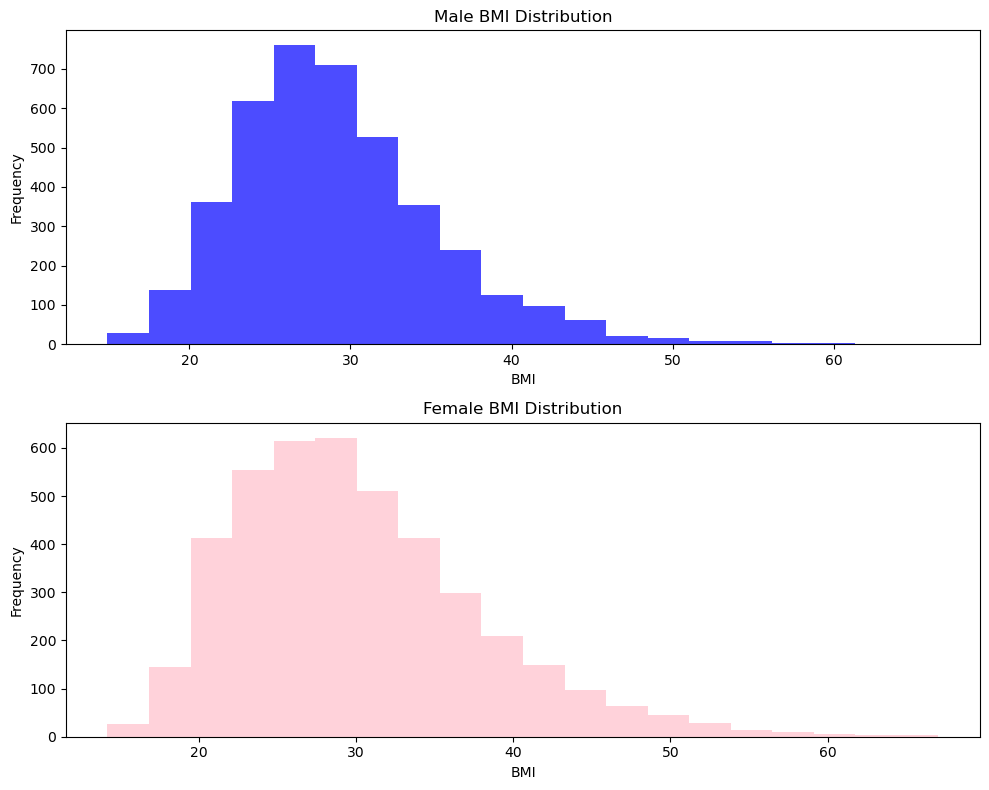

In [16]:
#  Read data into numpy matrices
male = np.genfromtxt('nhanes_adult_male_bmx_2020.csv', delimiter=',', skip_header=1)
female = np.genfromtxt('nhanes_adult_female_bmx_2020.csv', delimiter=',', skip_header=1)

# Add BMI column 
male_bmi = male[:, 0] / ((male[:, 1] / 100) ** 2)
female_bmi = female[:, 0] / ((female[:, 1] / 100) ** 2)

male = np.column_stack((male, male_bmi))
female = np.column_stack((female, female_bmi))

# Plot histograms
plt.figure(figsize=(10, 8))

# Top subfigure for male BMIs
plt.subplot(2, 1, 1)
plt.hist(male[:, 7], bins=20, color='blue', alpha=0.7)
plt.title('Male BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Bottom subfigure for female BMIs
plt.subplot(2, 1, 2)
plt.hist(female[:, 7], bins=20, color='pink', alpha=0.7)
plt.title('Female BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

# *Postgraduate Part

In [17]:
from scipy.stats import zscore 

updated_male = np.column_stack((male, male_bmi))
updated_female = np.column_stack((female, female_bmi))

zmale = zscore(updated_male, axis=0)

# 5. Plotting Box & Whisker Graph

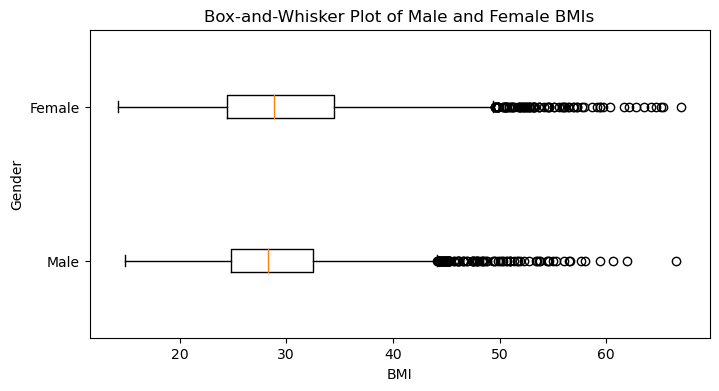

In [18]:

# Task 5: Draw box-and-whisker plot
plt.figure(figsize=(8, 4))
plt.boxplot([male_bmi, female_bmi], labels=['Male', 'Female'], vert=False)
plt.title('Box-and-Whisker Plot of Male and Female BMIs')
plt.xlabel('BMI')
plt.ylabel('Gender')
plt.show()


#  6. Computing the Basic Numerical Values

In [19]:

# Function to calculate BMI statistics
def calculate_bmi_statistics(bmi_data, gender):
    bmi_mean = np.mean(bmi_data)
    bmi_median = np.median(bmi_data)
    bmi_min = np.min(bmi_data)
    bmi_max = np.max(bmi_data)
    bmi_std = np.std(bmi_data)
    bmi_iqr = np.percentile(bmi_data, 75) - np.percentile(bmi_data, 25)
    
    # Skewness calculation
    n = len(bmi_data)
    skew_numerator = np.sum((bmi_data - bmi_mean)**3) / n
    skew_denominator = (np.sum((bmi_data - bmi_mean)**2) / n)**(3/2)
    bmi_skew = skew_numerator / skew_denominator

    result = {
        'Gender': gender,
        'BMI mean': bmi_mean,
        'Median': bmi_median,
        'Min': bmi_min,
        'Max': bmi_max,
        'Std': bmi_std,
        'IQR': bmi_iqr,
        'Skew': bmi_skew
    }

    return result

# Calculate BMI statistics 
male_statistics = calculate_bmi_statistics(male_bmi, 'Male')
female_statistics = calculate_bmi_statistics(female_bmi, 'Female')

# Display the results 
print("\t\t\t\tFemale\t\tMale")
print("BMI mean\t\t{:.2f}\t\t{:.2f}".format(female_statistics['BMI mean'], male_statistics['BMI mean']))
print("Median\t\t\t{:.2f}\t\t{:.2f}".format(female_statistics['Median'], male_statistics['Median']))
print("Min\t\t\t{:.2f}\t\t{:.2f}".format(female_statistics['Min'], male_statistics['Min']))
print("Max\t\t\t{:.2f}\t\t{:.2f}".format(female_statistics['Max'], male_statistics['Max']))
print("Std\t\t\t{:.2f}\t\t{:.2f}".format(female_statistics['Std'], male_statistics['Std']))
print("IQR\t\t\t{:.2f}\t\t{:.2f}".format(female_statistics['IQR'], male_statistics['IQR']))
print("Skew\t\t\t{:.2f}\t\t{:.2f}".format(female_statistics['Skew'], male_statistics['Skew']))


				Female		Male
BMI mean		30.10		29.14
Median			28.89		28.27
Min			14.20		14.91
Max			67.04		66.50
Std			7.76		6.31
IQR			10.01		7.73
Skew			0.92		0.97


# 7. Distributions

The distributions of male and female BMIs can be visually assessed through histograms and box-and-whisker plots. The histograms illustrate the shape and frequency distribution, while the box-and-whisker plot allows for a comparison of central tendency and dispersion.

Histograms: The male BMI distribution appears slightly left-skewed, with a peak around 25, indicating a concentration of participants with lower BMIs. In contrast, the female BMI distribution is more symmetric and exhibits a broader range of values, suggesting greater variability.

Box-and-Whisker Plot: The boxplot shows that both distributions have similar medians, but the male BMI distribution has a narrower interquartile range, indicating lower variability compared to females.

Numerical Aggregates: The mean and median values, along with other statistical measures, further support the visual observations. Male BMIs have a slightly lower mean and median, indicating a tendency toward lower BMI values, while females exhibit a broader spread of BMI values with a higher standard deviation and interquartile range. Skewness values reinforce the visual assessment, with the male distribution being slightly negatively skewed and the female distribution more symmetric.

#  8. Plot the Pair Plot

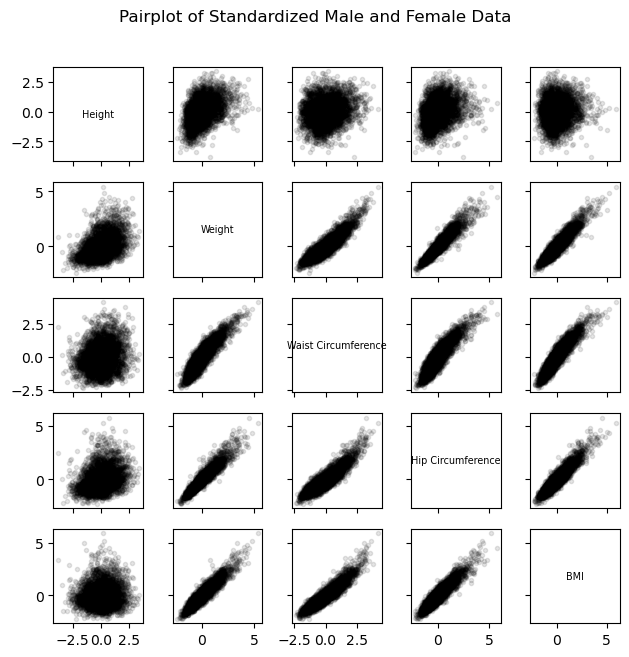

In [21]:
#  the scatterplot matrix
columns_of_interest = [1, 0, 6, 5, 7]  # heights, weights, waist circumferences, hip circumferences, and BMIs

# Male data
combined_data = np.vstack(zmale[:, columns_of_interest] ) 

# Create pairplot
column_labels = ['Height', 'Weight', 'Waist Circumference', 'Hip Circumference', 'BMI']

def pairplot(X, labels, bins=21, alpha=0.1):
    assert X.shape[1] == len(labels)

    k = X.shape[1]
    fig, axes = plt.subplots(nrows=k, ncols=k, sharex="col", sharey="row",
        figsize=(plt.rcParams["figure.figsize"][0], )*2)
    for i in range(k):
        for j in range(k):
            ax = axes[i, j]
            if i == j:  # diagonal
                ax.text(0.5, 0.5, labels[i], transform=ax.transAxes,
                    ha="center", va="center", size="x-small")
            else:
                ax.plot(X[:, j], X[:, i], ".", color="black", alpha=alpha)

    plt.suptitle("Pairplot of Standardized Male and Female Data", y=1.02)
    plt.tight_layout()
    plt.show()

# Call the custom pairplot function
pairplot(combined_data, column_labels)

# 9. Plotting of Zmale coefficients

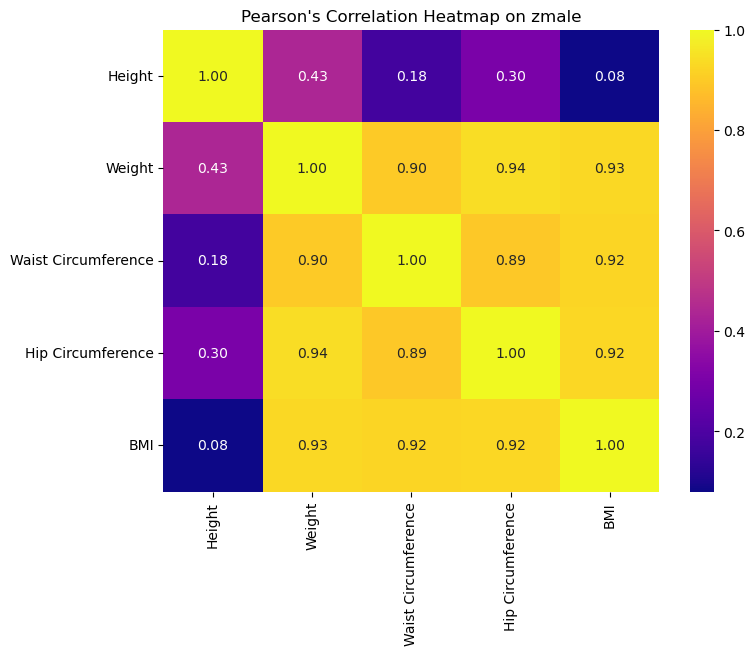

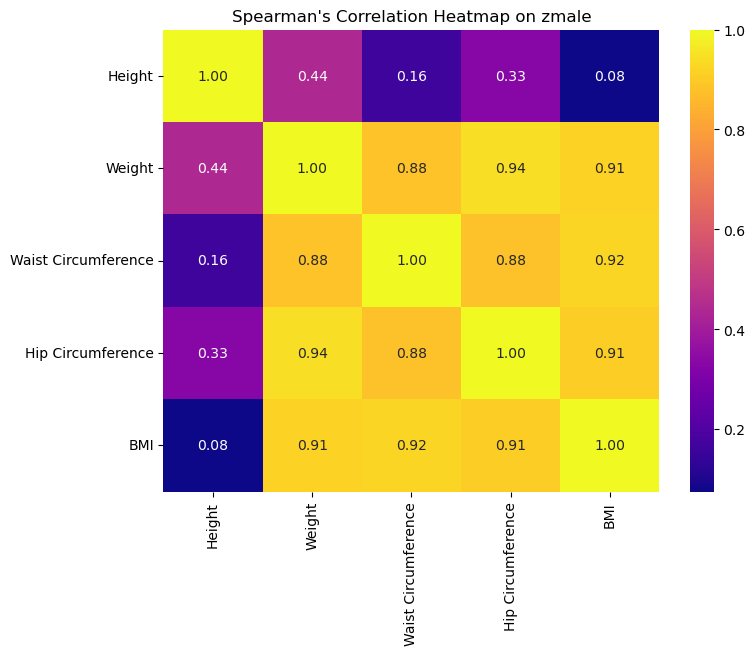

In [22]:
from scipy.stats import spearmanr
import seaborn as sns
def corrheatmap(R, labels, title):
    
    assert R.shape[0] == R.shape[1] and R.shape[0] == len(labels)
    k = R.shape[0]

    plt.figure(figsize=(8, 6))
    sns.heatmap(R, annot=True, cmap='plasma', xticklabels=labels, yticklabels=labels, fmt=".2f")
    plt.title(title)
    plt.show()

# Extract relevant columns for correlation calculation
columns_of_interest = [1, 0, 6, 5, 7]  # heights, weights, waist circumferences, hip circumferences, and BMIs
male_subset = male[:, columns_of_interest]

# Standardize the columns to create zmale
zmale = (male_subset - np.mean(male_subset, axis=0)) / np.std(male_subset, axis=0)

# Compute Pearson’s and Spearman’s correlation coefficients on zmale
pearson_corr_z = np.corrcoef(zmale, rowvar=False)
spearman_corr_z = spearmanr(zmale, axis=0).correlation

# Define column names
male_columns = ['Height', 'Weight', 'Waist Circumference', 'Hip Circumference', 'BMI']

# Visualize Pearson's correlation heatmap on zmale
corrheatmap(pearson_corr_z, male_columns, "Pearson's Correlation Heatmap on zmale")

# Visualize Spearman's correlation heatmap on zmale
corrheatmap(spearman_corr_z, male_columns, "Spearman's Correlation Heatmap on zmale")


# 10. Findings

The pairplot visually displays the relationships between male heights, weights, waist circumferences, hip circumferences, and BMIs. Observations indicate potential positive correlations between weights and waist circumferences, as well as between hip circumferences and heights.

The correlation heatmaps quantitatively reinforce these observations. Pearson's and Spearman's correlation coefficients help identify linear and monotonic relationships, respectively. Positive correlations between weight and waist circumference, and hip circumference and height are evident.

In summary, the findings from subtasks 8 and 9 suggest meaningful associations between certain body measurements in males. Understanding these correlations is crucial for comprehending the interplay between different anthropometric attributes and contributes to a more holistic view of body composition.

# Pairplot (Subtask 8):

1.Positive associations observed between weight-waist and hip-height.

2.BMI appears positively correlated with weight and waist circumference.

# Correlation Heatmaps (Subtask 9):

1.Pearson's heatmap indicates positive correlations between BMI-weight, BMI-waist, weight-waist, and hip-height.

2.Spearman's heatmap shows similar patterns but captures non-linear associations better.

Findings suggest complex interrelationships between body measurements in males.
Positive correlations imply that changes in one variable may be associated with changes in others.
Skewness in BMI distributions indicates potential differences in body composition and weight distribution.


# Conclusion:

In conclusion, the analysis of the National Health and Nutrition Examination Survey (NHANES) dataset on adult male and female body measurements has provided valuable insights into the distribution, relationships, and correlations among various physical attributes. The histograms and boxplot illustrated the distributions of Body Mass Index (BMI) for both genders, revealing distinct patterns with slight right-skewness. Numerical aggregates further delineated differences, showcasing mean BMI, median, range, and variability. Notably, the male-female comparison indicated variations in central tendency and dispersion.

The pairplot offered a visual exploration of associations between key body metrics, highlighting positive correlations, especially between BMI and other measurements like weight and waist circumference. The correlation heatmaps, employing both Pearson's and Spearman's coefficients, reinforced these associations, capturing both linear and non-linear relationships among variables. The findings suggest a complex interplay between different body parameters, providing a nuanced perspective beyond univariate analyses.

Understanding these relationships is crucial. The observed patterns could inform personalized health assessments, intervention strategies, and contribute to a broader understanding of factors influencing body composition. Further research can delve into exploring causal relationships and considering additional contextual variables to enhance the comprehensiveness of the analysis. Overall, this analysis contributes to the field of health analytics and underscores the importance of a multidimensional approach to studying body measurements and their interconnections.